In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y0.csv', header=None)

In [4]:
df.head()

,0
0,0.33990
1,0.31137
2,0.33044
3,0.31505
4,0.31880


In [5]:
df.describe()

,0
count,1.600000e+06
mean,8.239248e+00
std,5.029882e+00
min,2.761500e-01
25%,3.952270e+00
50%,8.079680e+00
75%,1.245782e+01
max,2.476669e+01


In [6]:
velocity = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_wind_speeds_manometer.csv')
velocity.head()

,PVDF peak mA,PVDF peak V,PVDF peak power,n/a,Solar mA 1,Solar V 1,solar mW 1,tunnel P,tunnel V,Patm,Tatm,num of 470k,Solar mA 2,Solar V 2,Solar mW 2
0,0.00007,0.0,0.0,0.0,inf,0.00168,inf,0.27127,0.67119,101325.0,20.0,0.0,inf,0.00171,inf
1,0.00007,0.0,0.0,0.0,inf,0.00166,inf,1.69845,1.67946,101325.0,20.0,0.0,inf,0.00167,inf
2,0.00007,0.0,0.0,0.0,inf,0.00168,inf,4.89781,2.85196,101325.0,20.0,0.0,inf,0.00170,inf
3,0.00007,0.0,0.0,0.0,inf,0.00166,inf,10.10309,4.09609,101325.0,20.0,0.0,inf,0.00169,inf
4,0.00007,0.0,0.0,0.0,inf,0.00166,inf,16.09979,5.17074,101325.0,20.0,0.0,inf,0.00168,inf


In [7]:
vel = pd.DataFrame(velocity.iloc[:,8])
vel.head()

,tunnel V
0,0.67119
1,1.67946
2,2.85196
3,4.09609
4,5.17074


In [8]:
vel.iloc[9]

tunnel V    11.01461
Name: 9, dtype: float64

In [9]:
#Welch
from scipy import signal
import numpy as np

### Y0

32
1.6015865667408396e-06


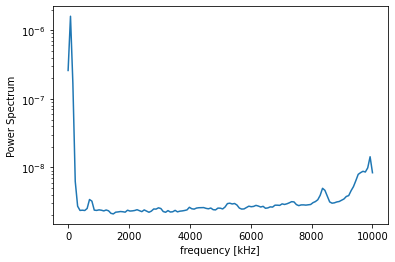


33
0.00044540298682572114


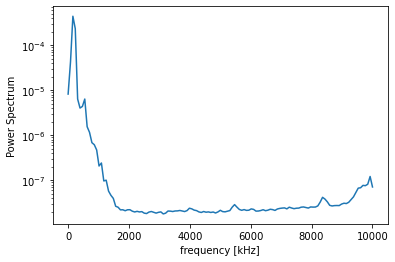


34
0.0012669832119451014


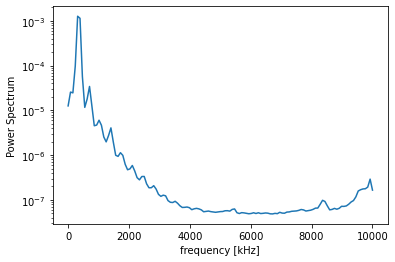


35
0.0013452984325354291


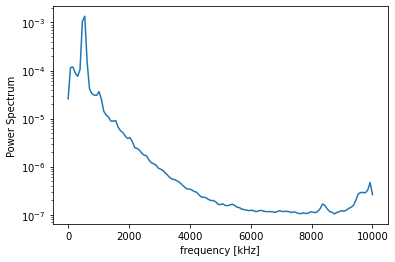


36
0.0017318074306789978


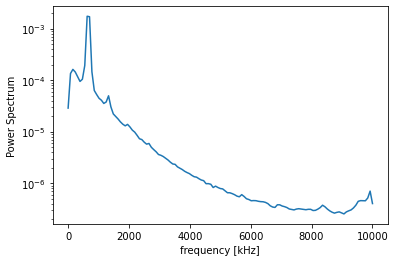


37
0.0027214499190326633


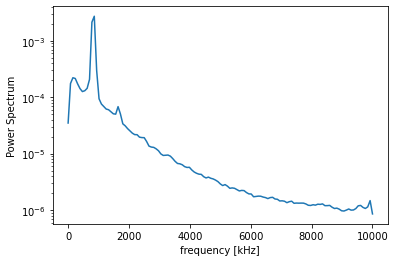


38
0.004119314000604317


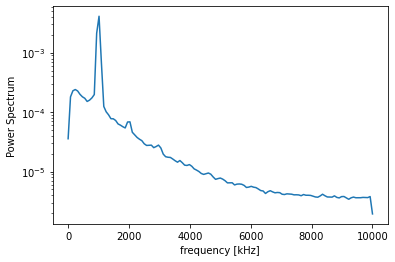


39
0.004820016527717903


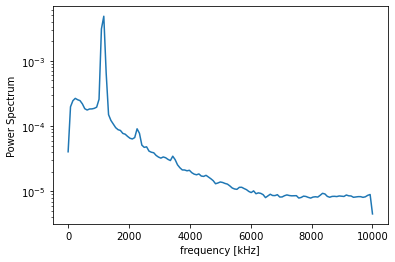


40
0.006380333800421937


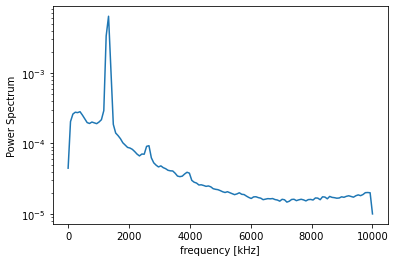


41
0.007799414668363106


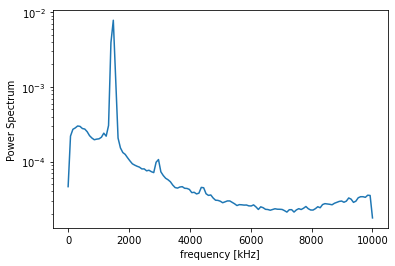


42
0.008484055169295283


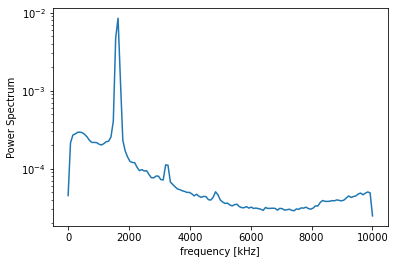


43
0.010281855915852319


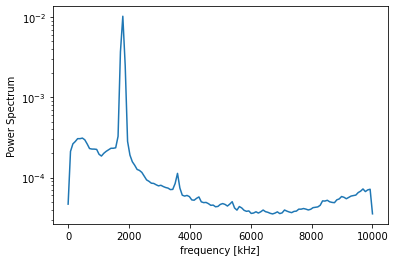


44
0.010078753935174344


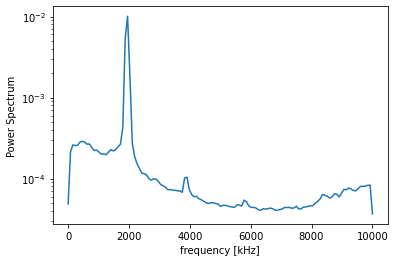


45
0.010219229822642572


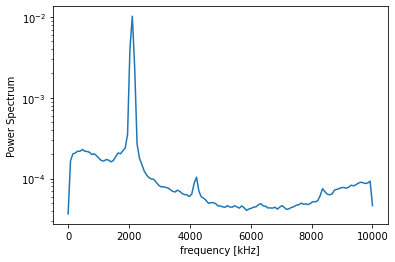


46
0.008569982892661697


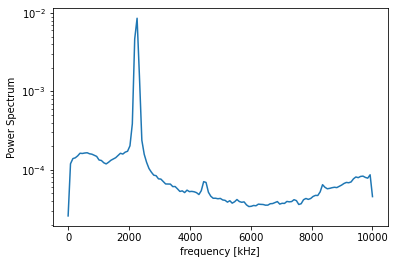


47
0.009917146269966691


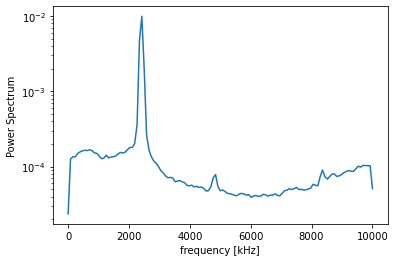

In [18]:
#Propiedades
d = 0.05
vis = 0.00000151
counter = 2*16
Fst = []
fexp = []
for i in range(0,1600000,100000):
    print(counter)
    try:
        fs = 20e3
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        #plt.figure()
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        fexp.append(y)
        x = 0
        
        y_=0
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x = vv
            if Pxx_spec[vv] == y/2:
                y_ = vv
        #x = x[Pxx.index]
        #x
        x = f[x]
        y_ = f[y_]
        #pŕint('Frecuency value')
        print(y)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.show()
        
        
        
    except:
        pass
        
    re = d*float(vel.iloc[counter])/vis
    print()
    
    st = 0.012-2.7/re
    fst = st*float(vel.iloc[counter])/d
    #print(fst)
    Fst.append(fst)
    
    
    counter += 1
    

Text(0, 0.5, 'fst')

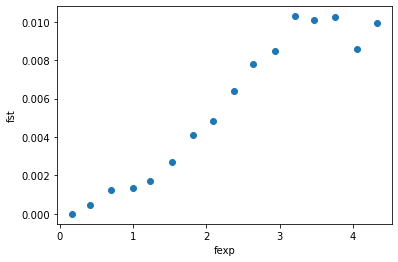

In [11]:
plt.scatter(Fst,fexp)
plt.xlabel('fexp')
plt.ylabel('fst')

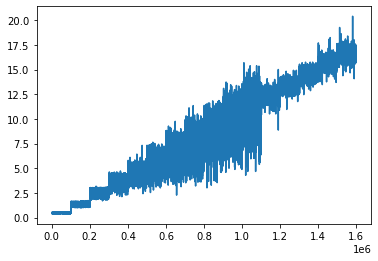

In [19]:
df1 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y1.csv', header=None)
plt.plot(df1[0])

### Y1

48
1.7331688477129942e-06


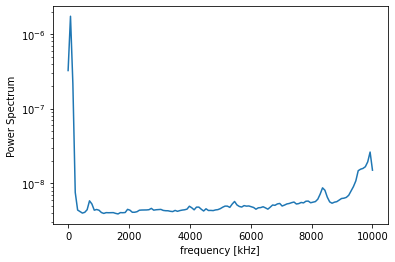


49
0.00015285594414177564


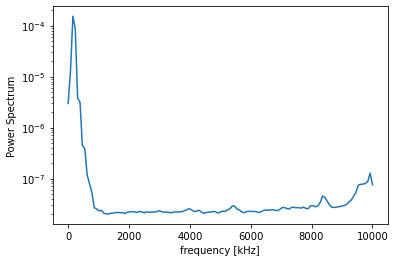


50
0.00036580921212389016


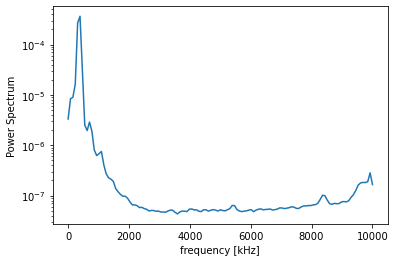


51
0.0004883964399014951


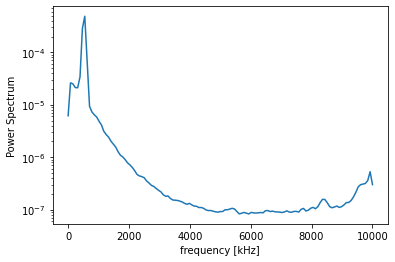


52
0.0005125379333999492


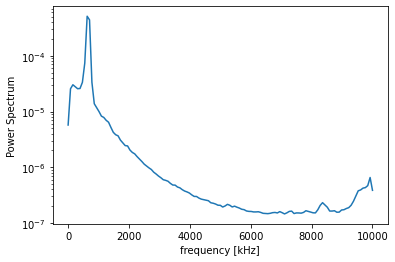


53
0.0007014228381090127


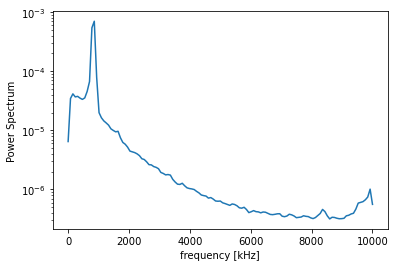


54
0.0010428948540271918


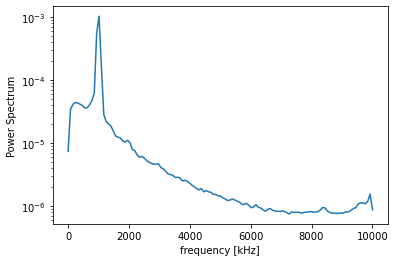


55
0.0012653181331748924


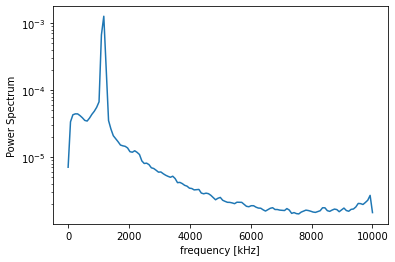


56
0.0015669043003088128


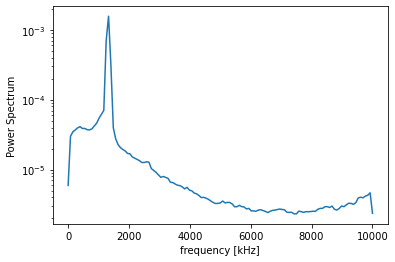


57
0.0017610891577046497


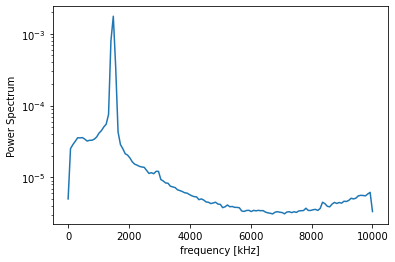


58
0.001863020145798899


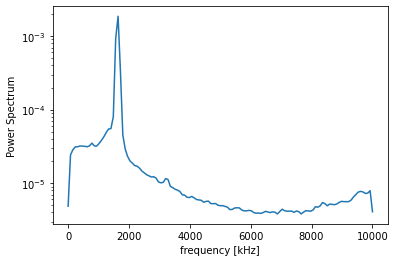


59
0.0004393400373061041


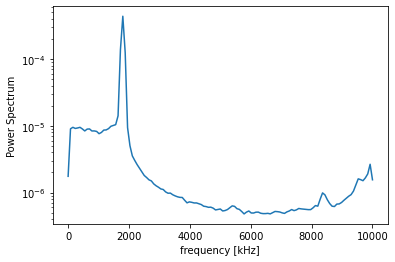


60
0.00035787665115600057


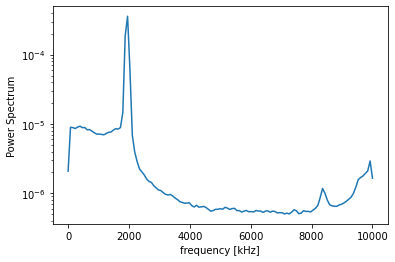


61
0.0003666304280510615


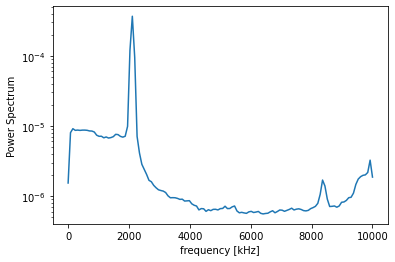


62
0.00038145167330866896


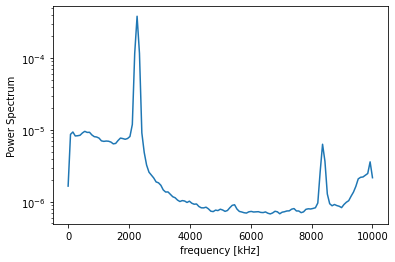


63
0.00032846197309877446


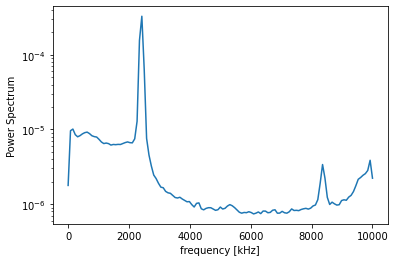

In [20]:
#Propiedades
d = 0.05
vis = 0.00000151
counter = 3*16
Fst = []
fexp = []
for i in range(0,1600000,100000):
    print(counter)
    try:
        fs = 20e3
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        #plt.figure()
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        fexp.append(y)
        x = 0
        
        y_=0
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x = vv
            if Pxx_spec[vv] == y/2:
                y_ = vv
        #x = x[Pxx.index]
        #x
        x = f[x]
        y_ = f[y_]
        #pŕint('Frecuency value')
        print(y)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.show()
        
        
        
    except:
        pass
        
    re = d*float(vel.iloc[counter])/vis
    print()
    
    st = 0.012-2.7/re
    fst = st*float(vel.iloc[counter])/d
    #print(fst)
    Fst.append(fst)
    
    
    counter += 1

Text(0, 0.5, 'fst')

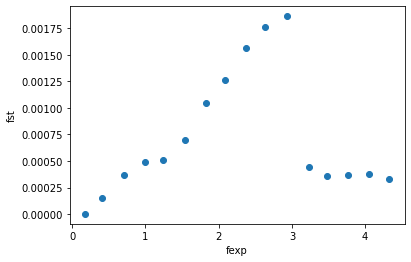

In [21]:
plt.scatter(Fst,fexp)
plt.xlabel('fexp')
plt.ylabel('fst')

## y-1

0
6.777282604721363e-06


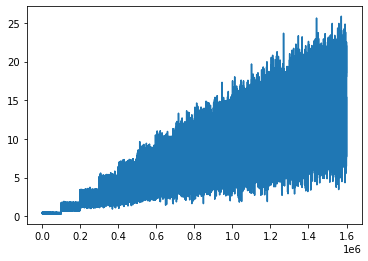

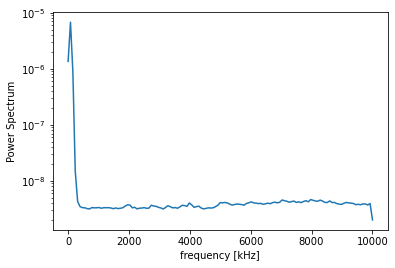


1
0.000656045053056579


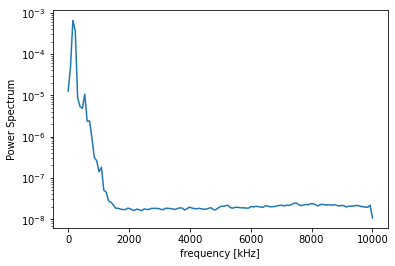


2
0.001668613174634153


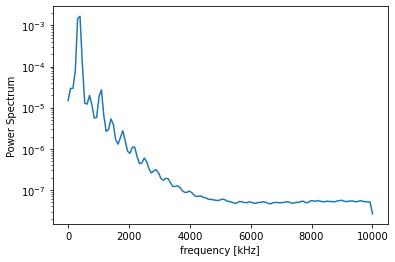


3
0.0028612198530794655


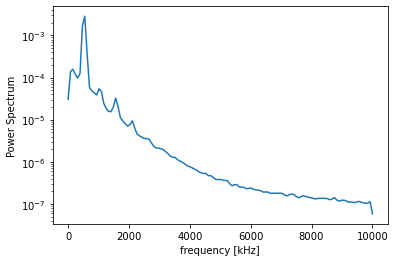


4
0.004030456257490402


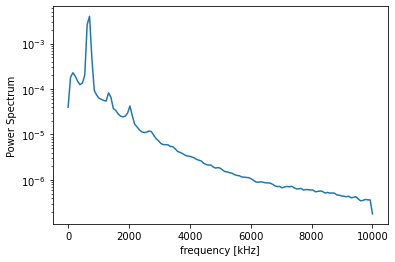


5
0.005860236676637147


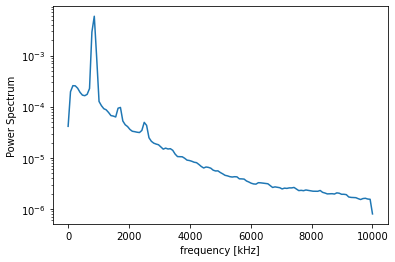


6
0.00772060740995434


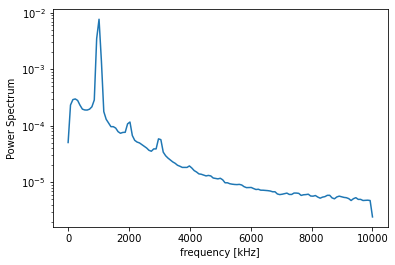


7
0.010039821197736078


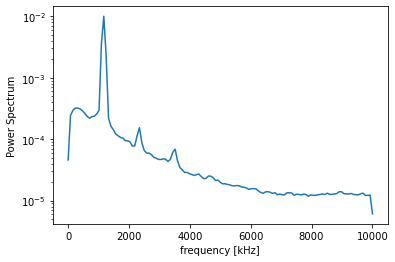


8
0.011996607179923603


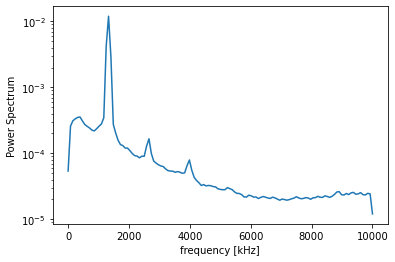


9
0.01382933288663742


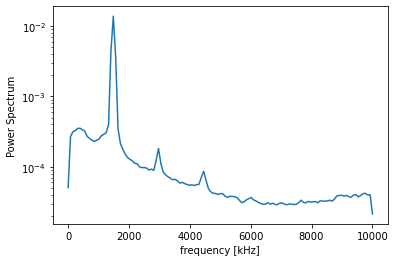


10
0.017167616639941045


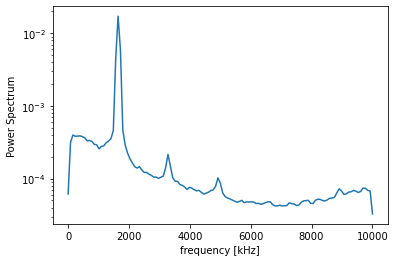


11
0.01911432745926168


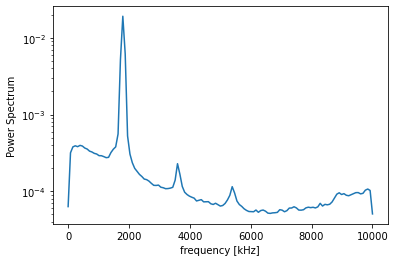


12
0.019701156545210836


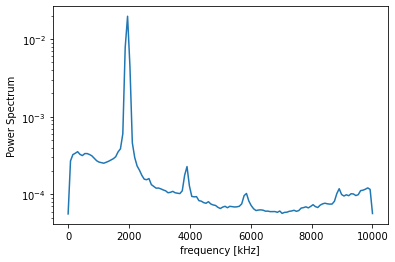


13
0.02272346989754373


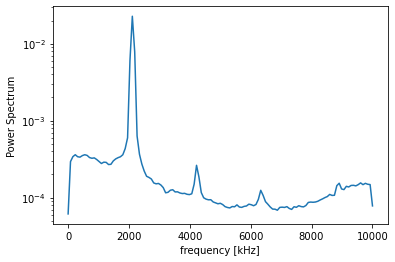


14
0.024906015315797413


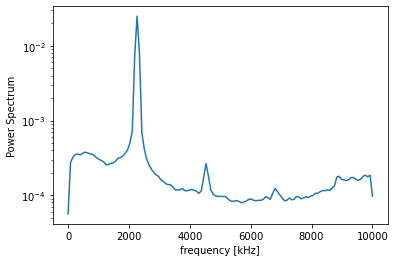


15
0.026916912575019745


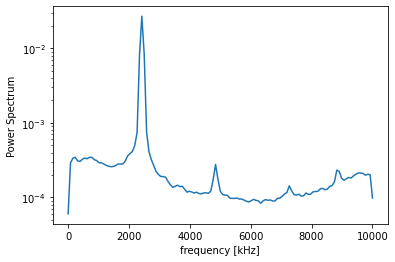

Text(0, 0.5, 'fst')

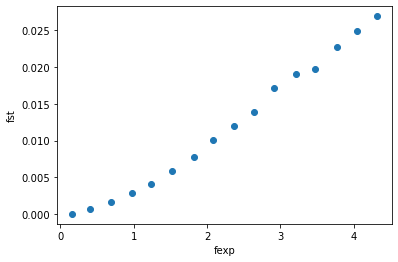

In [24]:
df1 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_yminus1.csv', header=None)
plt.plot(df1[0])

### Y1

#Propiedades
d = 0.05
vis = 0.00000151
counter = 0*16
Fst = []
fexp = []
for i in range(0,1600000,100000):
    print(counter)
    try:
        fs = 20e3
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        #plt.figure()
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        fexp.append(y)
        x = 0
        
        y_=0
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x = vv
            if Pxx_spec[vv] == y/2:
                y_ = vv
        #x = x[Pxx.index]
        #x
        x = f[x]
        y_ = f[y_]
        #pŕint('Frecuency value')
        print(y)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.show()
        
        
        
    except:
        pass
        
    re = d*float(vel.iloc[counter])/vis
    print()
    
    st = 0.012-2.7/re
    fst = st*float(vel.iloc[counter])/d
    #print(fst)
    Fst.append(fst)
    
    
    counter += 1

plt.scatter(Fst,fexp)
plt.xlabel('fexp')
plt.ylabel('fst')

## y-2

16
4.204741892754103e-06


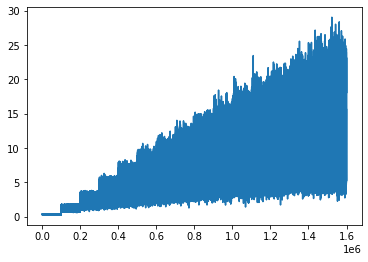

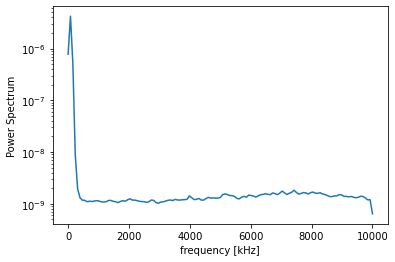


17
0.0005568396797439183


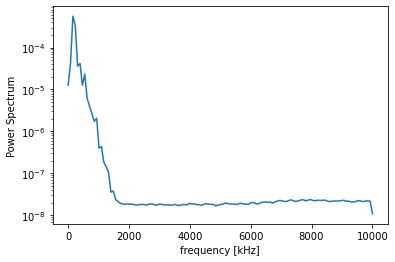


18
0.00197139155363262


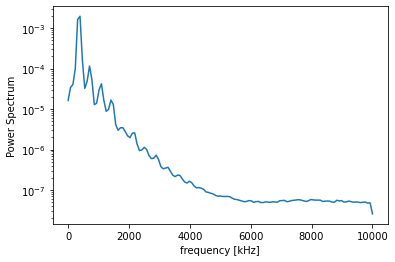


19
0.004513789845247266


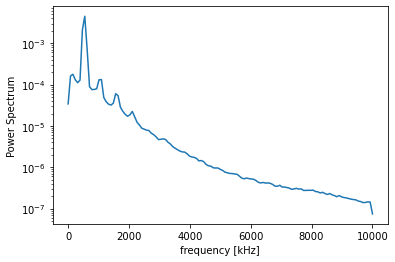


20
0.006167794541361375


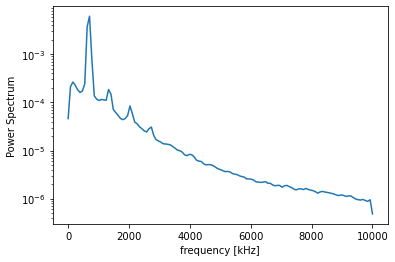


21
0.009060566687514097


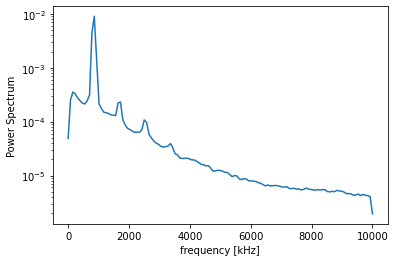


22
0.012801738815460333


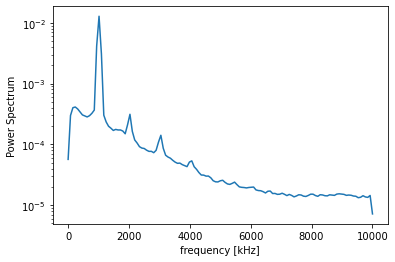


23
0.016077965821816205


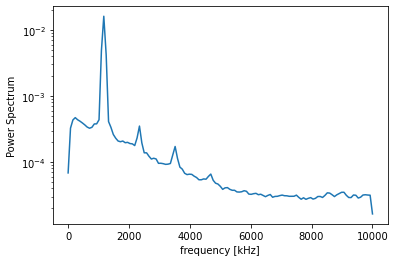


24
0.02056542935718542


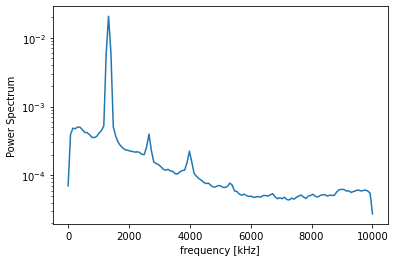


25
0.0255782445434908


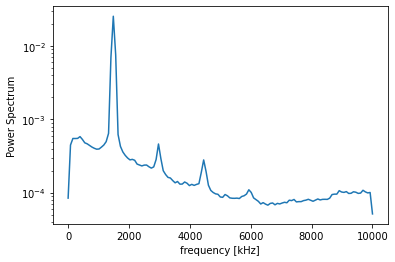


26
0.029632258452448622


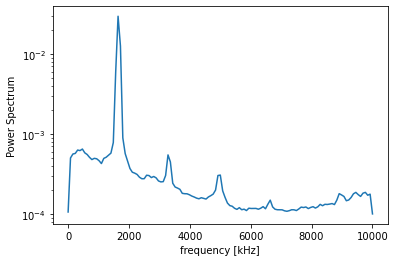


27
0.035514331570494925


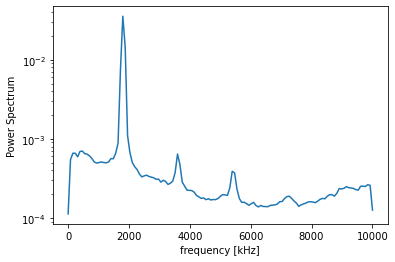


28
0.041475357823608276


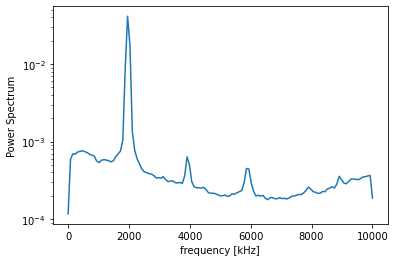


29
0.04797640488239361


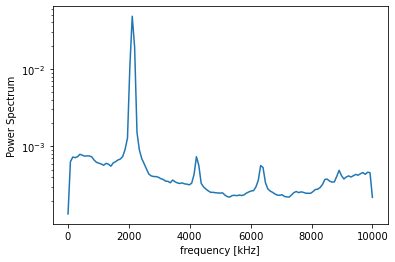


30
0.05383162716812688


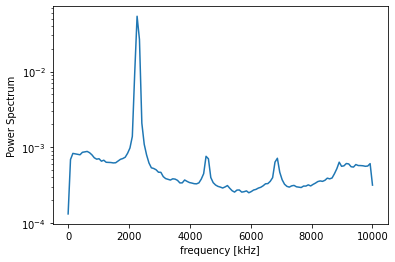


31
0.06198748334160325


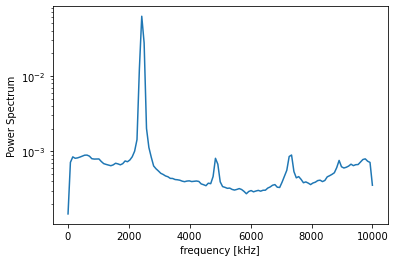

Text(0, 0.5, 'fst')

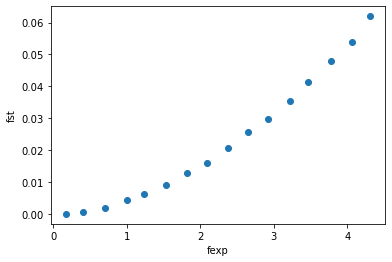

In [25]:
df1 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_yminus2.csv', header=None)
plt.plot(df1[0])

### Y1

#Propiedades
d = 0.05
vis = 0.00000151
counter = 1*16
Fst = []
fexp = []
for i in range(0,1600000,100000):
    print(counter)
    try:
        fs = 20e3
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        #plt.figure()
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        fexp.append(y)
        x = 0
        
        y_=0
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x = vv
            if Pxx_spec[vv] == y/2:
                y_ = vv
        #x = x[Pxx.index]
        #x
        x = f[x]
        y_ = f[y_]
        #pŕint('Frecuency value')
        print(y)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.show()
        
        
        
    except:
        pass
        
    re = d*float(vel.iloc[counter])/vis
    print()
    
    st = 0.012-2.7/re
    fst = st*float(vel.iloc[counter])/d
    #print(fst)
    Fst.append(fst)
    
    
    counter += 1

plt.scatter(Fst,fexp)
plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

192
3.1049031134437435e-06


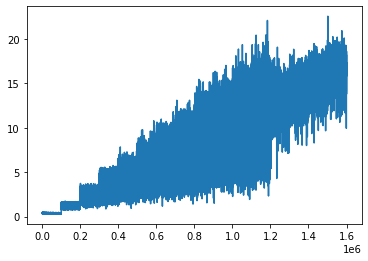

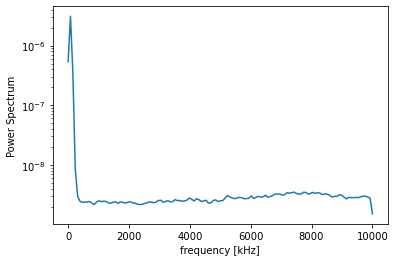


193
0.0002747199999363091


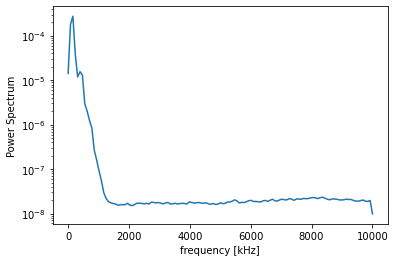


194
0.0007172208487258867


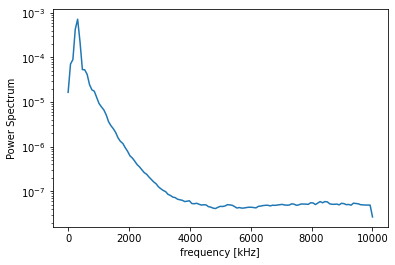


195
0.0017078123526886194


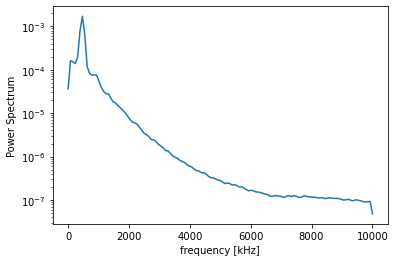


196
0.002259040566320538


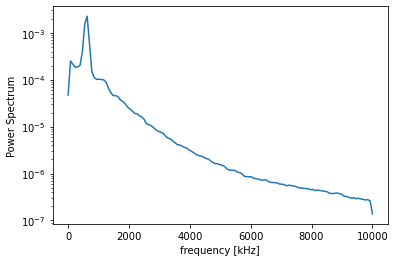


197
0.0028030785791244707


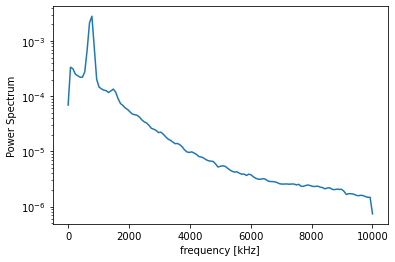


198
0.0030926564310265682


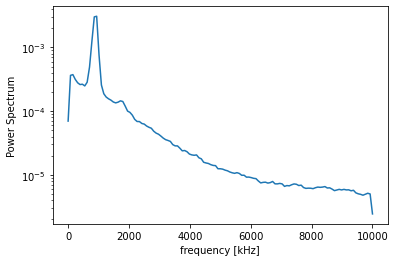


199
0.004108414373030194


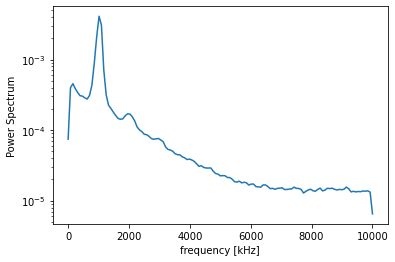


200
0.004603636459913895


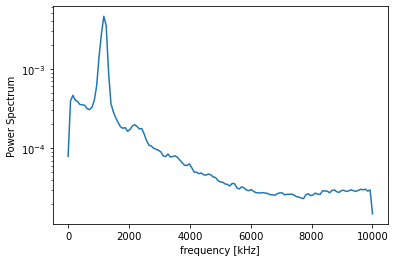


201
0.0049235473103259025


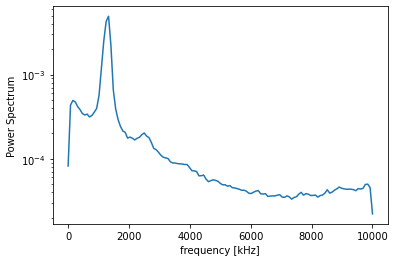


202
0.006030630209512185


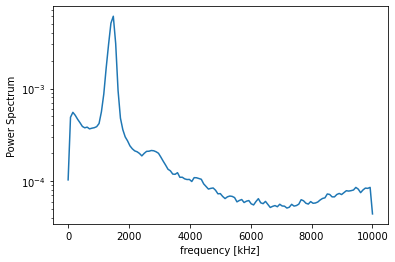


203
0.006035227691745081


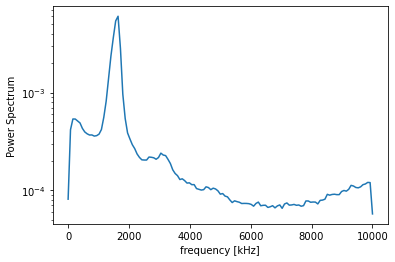


204
0.0013943248339128938


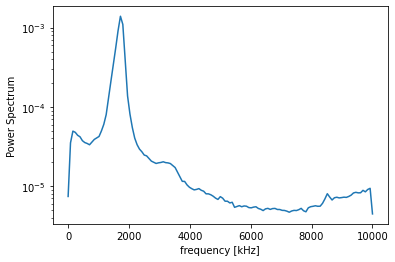


205
0.0012750942914760333


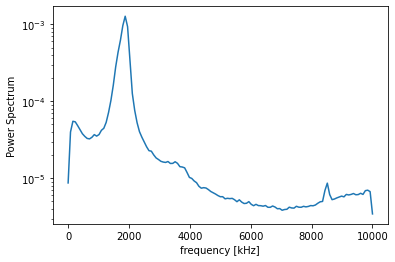


206
0.0013699880374615499


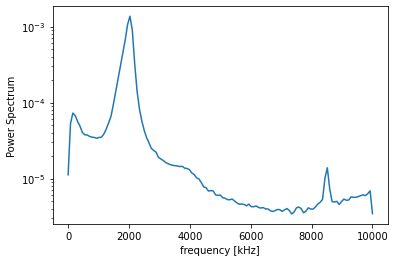


207
0.0012709380258835033


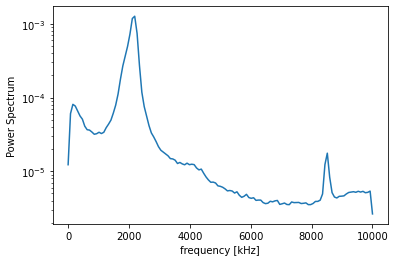

Text(0, 0.5, 'fst')

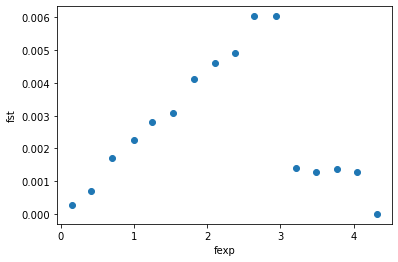

In [26]:
df1 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y9.csv', header=None)
plt.plot(df1[0])

### Y1

#Propiedades
d = 0.05
vis = 0.00000151
counter = 12*16
Fst = []
fexp = []
for i in range(0,1600000,100000):
    print(counter)
    try:
        fs = 20e3
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        #plt.figure()
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        fexp.append(y)
        x = 0
        
        y_=0
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x = vv
            if Pxx_spec[vv] == y/2:
                y_ = vv
        #x = x[Pxx.index]
        #x
        x = f[x]
        y_ = f[y_]
        #pŕint('Frecuency value')
        print(y)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.show()
        
        
        
    except:
        pass
        
    re = d*float(vel.iloc[counter])/vis
    print()
    
    st = 0.012-2.7/re
    fst = st*float(vel.iloc[counter])/d
    #print(fst)
    Fst.append(fst)
    
    
    counter += 1

plt.scatter(Fst,fexp)
plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

64
3.7041958916147507e-06


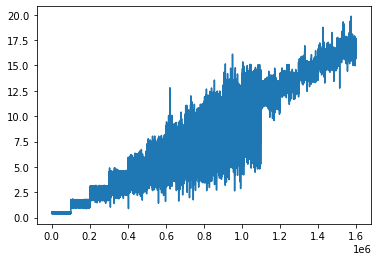

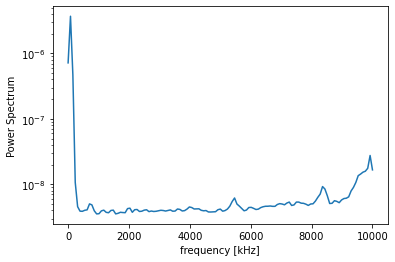


65
0.00026574964145792624


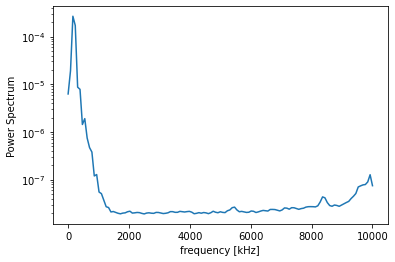


66
0.0005742241407845738


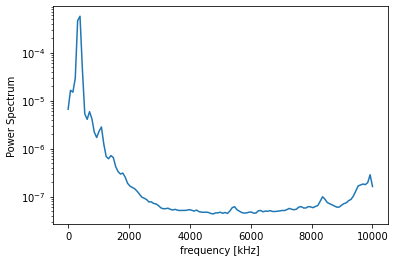


67
0.0008383472944641692


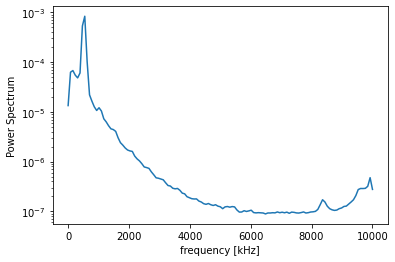


68
0.0009558710612980571


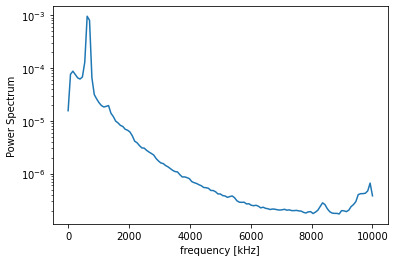


69
0.0013787782403644785


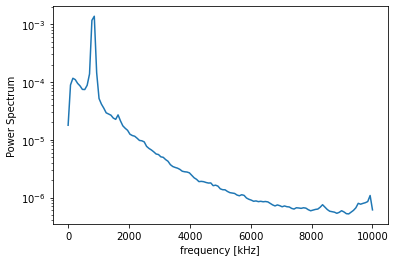


70
0.001993632166705649


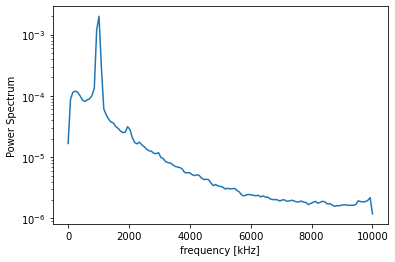


71
0.002383615750547567


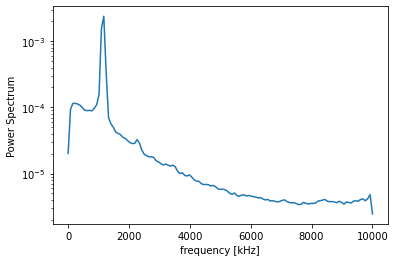


72
0.003153781485333491


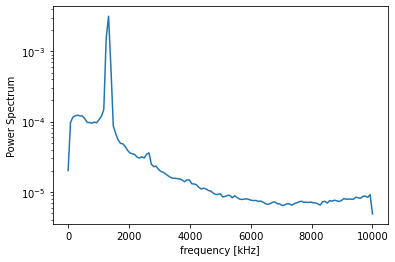


73
0.003194258485662659


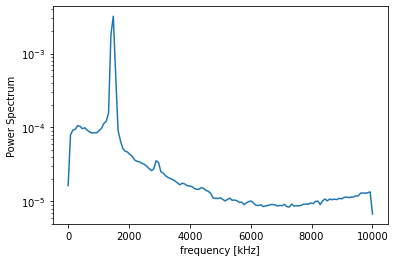


74
0.0029707136925255758


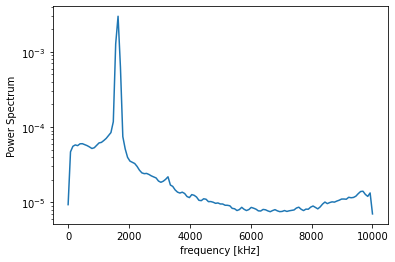


75
0.0007235372630006455


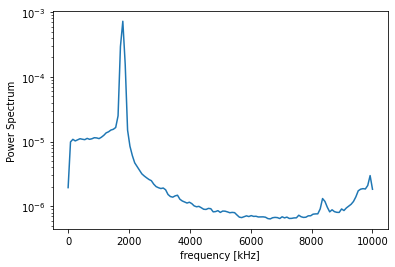


76
0.00043037097067336603


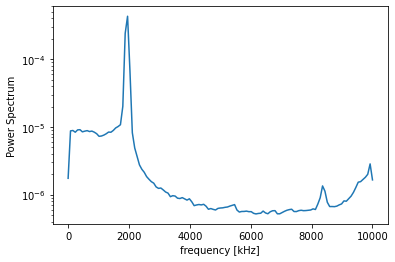


77
0.000406627144496221


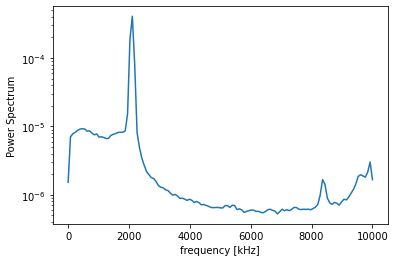


78
0.00045513683329547215


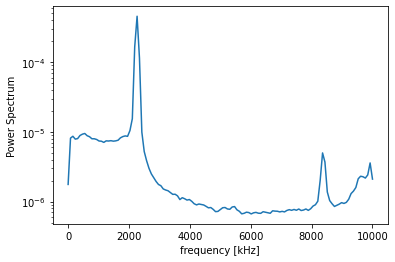


79
0.00043687093890678496


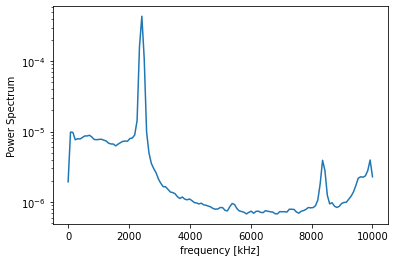

Text(0, 0.5, 'fst')

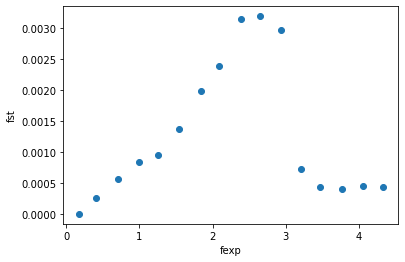

In [28]:
df1 = pd.read_csv('/home/bryan/Escritorio/Ayudantías 2021/Bent_cylinder_L100_90deg_y2.csv', header=None)
plt.plot(df1[0])

### Y1

#Propiedades
d = 0.05
vis = 0.00000151
counter = 4*16
Fst = []
fexp = []
for i in range(0,1600000,100000):
    print(counter)
    try:
        fs = 20e3
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        #plt.figure()
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        fexp.append(y)
        x = 0
        
        y_=0
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x = vv
            if Pxx_spec[vv] == y/2:
                y_ = vv
        #x = x[Pxx.index]
        #x
        x = f[x]
        y_ = f[y_]
        #pŕint('Frecuency value')
        print(y)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.show()
        
        
        
    except:
        pass
        
    re = d*float(vel.iloc[counter])/vis
    print()
    
    st = 0.012-2.7/re
    fst = st*float(vel.iloc[counter])/d
    #print(fst)
    Fst.append(fst)
    
    
    counter += 1

plt.scatter(Fst,fexp)
plt.xlabel('fexp')
plt.ylabel('fst')